#Reaching the magical plateau

Major League Baseball franchise's are looking for whatever advantage possible to get to the world series.

["Moneyball"](https://en.wikipedia.org/wiki/Moneyball_(film)), has helped conceptualized the importance of gathering and analyizing data for the MLB.

What does this mean?

For the unintiated, ["Moneyball"](https://en.wikipedia.org/wiki/Moneyball_(film)) popularized  Sabermateric principles, essentially utilizing a quantitiative approach to baseball applying mathematical and statistical analysis of baseball records to evaluate players past preformance and predict future preformance.

#How can we achive a winning season?

We want to look at our teams baseball players and determine if the following hypotheses in relation to their stats.

To help increase our win rate I have two hypotheses to review:

1. There is no significant difference in wins based on ERA (earned run avg.)

    Ho: μ1-μ2=0

    Ha: μ1-μ2≠0
2. There is no significant difference in Wins based on OBP (On-base Percentage)

    Ho: μ1-μ2=0

    Ha: μ1-μ2≠0

What is an Earned Run Average (ERA) and why is it important?


*   ERA represents a players number of earned runs a pitcher allowes per nine innings iwhout the aid of an error or passed ball.
*  What does this mean? The ERA tells us how well a pitcher prevented runs from scoring.



What is an On-base Percentage (OBP) and why is it important?


*   OBP referes a baseball players frequency of reaching a base.
*   What does this mean? A hitter wants to hit the pitch and score.  OBP provides insight on which hitters are more successful with this goal




#What data are we using to review these hypotheses?


[Teams.csv](https://drive.google.com/file/d/1k7ebTptvyWYYCB6Vjc-rapS33x8Minc_/view?usp=sharing) from [Sean Lahman's Baseball Database](https://www.seanlahman.com/baseball-archive/statistics/)

Utlizing data between 1976 and 2019
Omitted 2020 data due to season being 60 games vs standard 162 games

Fields used within dataframe:


*   W - Wins per team

*   ERA -Earned Run Average
*   H - Hits (at plate)


*   BB - Walk to base

*   AB - At Bat 
*   SF - Sacrifice Flies 

*   HBP - Hit by pitch 

Fields created that are not part of the dataset:


*   OBP - On Base Percentage

In [ ]:
#connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import libraries
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/gdrive/My Drive/Thinkful/Capstone_3/Stats.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          1158 non-null   int64  
 1   lgID            1158 non-null   object 
 2   teamID          1158 non-null   object 
 3   franchID        1158 non-null   object 
 4   divID           1158 non-null   object 
 5   Rank            1158 non-null   int64  
 6   G               1158 non-null   int64  
 7   Ghome           1158 non-null   int64  
 8   W               1158 non-null   int64  
 9   L               1158 non-null   int64  
 10  DivWin          1158 non-null   object 
 11  WCWin           716 non-null    object 
 12  LgWin           1158 non-null   object 
 13  WSWin           1158 non-null   object 
 14  R               1158 non-null   int64  
 15  AB              1158 non-null   int64  
 16  H               1158 non-null   int64  
 17  2B              1158 non-null   i

#Determining OBP

In [ ]:
OBP_df = df.assign(OBP = (df.H + df.BB + df.HBP)/(df.AB + df.BB + df.HBP + df.SF))
OBP_df.head

<bound method NDFrame.head of       yearID lgID teamID franchID  ... teamIDBR  teamIDlahman45  teamIDretro       OBP
0       1976   AL    CLE      CLE  ...      CLE             CLE          CLE  0.320865
1       1976   AL    NYA      NYY  ...      NYY             NYA          NYA  0.327710
2       1976   AL    CHA      CHW  ...      CHW             CHA          CHA  0.314347
3       1976   AL    DET      DET  ...      DET             DET          DET  0.315137
4       1976   AL    ML4      MIL  ...      MIL             MIL          MIL  0.311141
...      ...  ...    ...      ...  ...      ...             ...          ...       ...
1153    2019   NL    SLN      STL  ...      STL             SLN          SLN  0.322122
1154    2019   AL    TBA      TBD  ...      TBR             TBA          TBA  0.325315
1155    2019   AL    TEX      TEX  ...      TEX             TEX          TEX  0.319321
1156    2019   AL    TOR      TOR  ...      TOR             TOR          TOR  0.305021
1157    2019 

#Correlation

Degree of coordination with OBP and ERA to Wins

In [ ]:
OBP_df[['W', 'OBP', 'ERA']].corr()

,W,OBP,ERA
W,1.000000,0.521421,-0.559978
OBP,0.521421,1.000000,0.197782
ERA,-0.559978,0.197782,1.000000


Positivie correlation between Wins and OBP.

*   Positivie correlation between Wins and OBP.
* Negative correlation between Wins and ERA

Reject null hypothesis.

Ideal stats = higher OBP and lower ERA



In [ ]:
stats.pearsonr(OBP_df['W'], OBP_df['OBP'])

(0.5214210496991046, 1.0127955506396897e-81)

p-value <.001 - Strong linear relationship between two datasets



In [ ]:
stats.pearsonr(OBP_df['W'], OBP_df['ERA'])

(-0.5599778916612145, 1.486274931967123e-96)

p-value <.001

Strong linear relationship between two datasets

#Win/Loss

Testing ERA and OBP of teamins with more and less than 81 win median

> 162 games per season



Creating a DataFrame with teams that won more than 81 games within a season

In [ ]:
o_81 = OBP_df.iloc[(OBP_df['W'] > 81).values]
o_81.head

<bound method NDFrame.head of       yearID lgID teamID franchID  ... teamIDBR  teamIDlahman45  teamIDretro       OBP
1       1976   AL    NYA      NYY  ...      NYY             NYA          NYA  0.327710
5       1976   AL    OAK      OAK  ...      OAK             OAK          OAK  0.323413
7       1976   AL    BAL      BAL  ...      BAL             BAL          BAL  0.309579
8       1976   AL    BOS      BOS  ...      BOS             BOS          BOS  0.324152
11      1976   NL    CIN      CIN  ...      CIN             CIN          CIN  0.356668
...      ...  ...    ...      ...  ...      ...             ...          ...       ...
1146    2019   NL    NYN      NYM  ...      NYM             NYN          NYN  0.328330
1147    2019   AL    OAK      OAK  ...      OAK             OAK          OAK  0.327212
1153    2019   NL    SLN      STL  ...      STL             SLN          SLN  0.322122
1154    2019   AL    TBA      TBD  ...      TBR             TBA          TBA  0.325315
1157    2019 

What is the mean of the ranage of data?

In [ ]:
o_81[['W', 'OBP', 'ERA']].describe()

,W,OBP,ERA
count,570.000000,570.000000,570.000000
mean,90.540351,0.333598,3.874123
std,5.971163,0.013110,0.446909
min,82.000000,0.300337,2.910000
25%,86.000000,0.324250,3.562500
50%,90.000000,0.332693,3.830000
75%,95.000000,0.341530,4.160000
max,116.000000,0.373442,5.590000


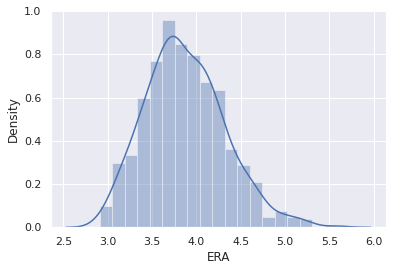

In [ ]:
ax = sns.distplot(o_81['ERA'])

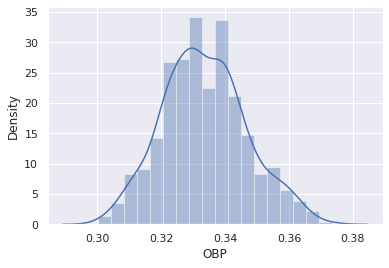

In [ ]:
ax = sns.distplot(o_81['OBP'])

Creating a DataFrame with teams that won less than 81 games within a season

In [ ]:
u_81 = OBP_df.iloc[(OBP_df['W'] < 81).values]
u_81.head

<bound method NDFrame.head of       yearID lgID teamID franchID  ... teamIDBR  teamIDlahman45  teamIDretro       OBP
2       1976   AL    CHA      CHW  ...      CHW             CHA          CHA  0.314347
3       1976   AL    DET      DET  ...      DET             DET          DET  0.315137
4       1976   AL    ML4      MIL  ...      MIL             MIL          MIL  0.311141
6       1976   NL    ATL      ATL  ...      ATL             ATL          ATL  0.319500
9       1976   AL    CAL      ANA  ...      CAL             CAL          CAL  0.306374
...      ...  ...    ...      ...  ...      ...             ...          ...       ...
1150    2019   NL    SDN      SDP  ...      SDP             SDN          SDN  0.307641
1151    2019   AL    SEA      SEA  ...      SEA             SEA          SEA  0.315543
1152    2019   NL    SFN      SFG  ...      SFG             SFN          SFN  0.302148
1155    2019   AL    TEX      TEX  ...      TEX             TEX          TEX  0.319321
1156    2019 

What is the mean of the range of data?

In [ ]:
u_81[['W', 'ERA', 'OBP']].describe()

,W,ERA,OBP
count,555.000000,555.000000,555.000000
mean,71.063063,4.412486,0.321221
std,6.620010,0.518751,0.012426
min,43.000000,2.950000,0.291364
25%,67.000000,4.045000,0.312739
50%,72.000000,4.410000,0.320665
75%,76.000000,4.770000,0.328951
max,80.000000,6.380000,0.360576


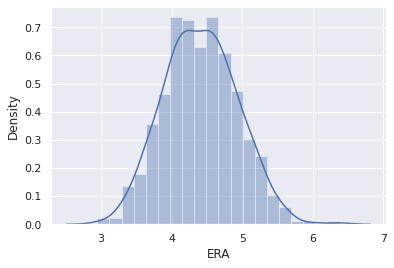

In [ ]:
ax = sns.distplot(u_81['ERA'])

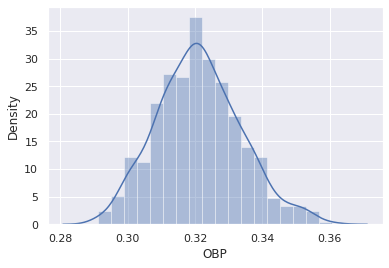

In [ ]:
ax = sns.distplot(u_81['OBP'])

#T-Test

Testing relationship between teams with greater than 81 wins and teams with less than 81 wins

OBP

In [ ]:
stats.ttest_ind(u_81['OBP'], o_81['OBP'])

Ttest_indResult(statistic=-16.24404944595227, pvalue=1.8649078305545513e-53)

p-value <.001, reject the null hypothesis.

Statistical differnce in OBP when comparing teams with more and less wins

Plot = OBP > 81 wins

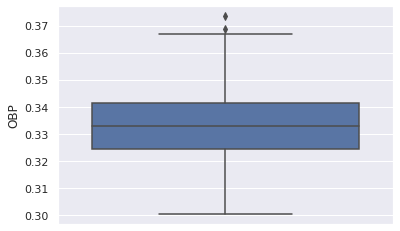

In [ ]:
sns.boxplot(y='OBP', data=o_81)

Difference with teams with more than 81 wins have a spread of .325 to .34

Plot = OBP < 81 wins

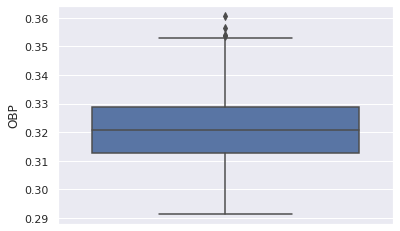

In [ ]:
sns.boxplot(y='OBP', data=u_81)

Difference with teams with less than 81 wins have a spread of .315 to .33

Teams with more than 81 wins have an Inter Qualrtile Range form .325 to .34 and teams that have less than 81 wins have an Inter Quartile Range from .315 to .33.

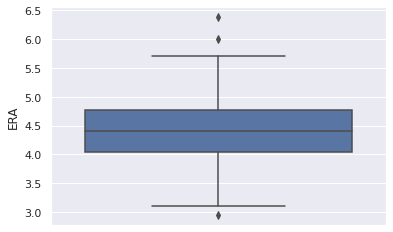

In [ ]:
sns.boxplot(y='ERA', data=u_81)

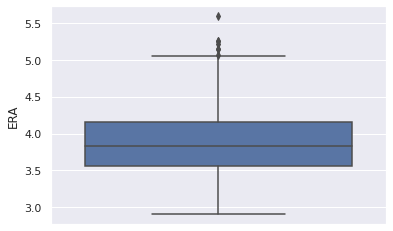

In [ ]:
sns.boxplot(y='ERA', data=o_81)

Teams with more than 81 wins have an Inter Qualrtile Range mostly below 4 and teams that have less than 81 wins have an Inter Quartile Range above 4.

#Results

In reviewing the T-Test Results, we can determine that OBP and ERA have an impact on wins.  We want lower the teams ERA while increasing the teams OBP.

Visulaized Below:


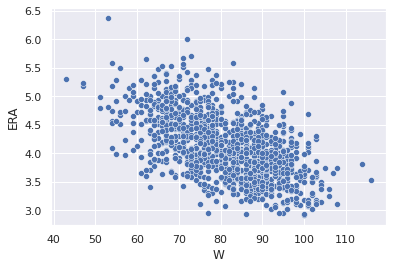

In [ ]:
sns.scatterplot(x='W', y='ERA', data=OBP_df)

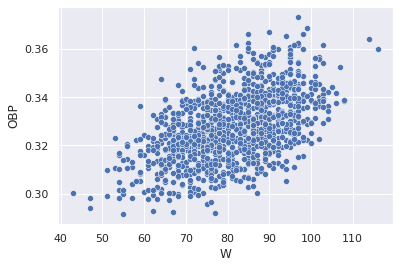

In [ ]:
sns.scatterplot(x='W', y='OBP', data=OBP_df)

In [ ]:
s_1 = u_81.shape[0]
s_2 = o_81.shape[0]
s_1_mean = u_81['ERA'].mean()
s_2_mean = o_81['ERA'].mean()
s_1_var = u_81['ERA'].var()
s_2_var = o_81['ERA'].var()

import math
std_err_difference = math.sqrt((s_1_var/s_1)+(s_2_var/s_2))
mean_difference = s_1_mean - s_2_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The means difference is at a 95% confidnece interval — between "+str(ci_lower)+" and "+str(ci_upper)+".")

The means difference is at a 95% confidnece interval — between 0.48171769230068606 and 0.5950096666372058.


In review, in order to hit the magical plateau of achiving a wining season we will need to increase our OBP while lowering our ERA.

How do we achive this?


*  Pushout players who have a low ERA
*  Obtain players who have an OBP

By excuting this, we increase our chances of heading to the World Series!

